In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
traindir = '../input/paddy-disease-classification/train_images/'

bacterial_leaf_blight_dir = os.path.join(traindir, 'bacterial_leaf_blight')
bacterial_leaf_streak_dir = os.path.join(traindir, 'bacterial_leaf_streak')
bacterial_panicle_blight_dir = os.path.join(traindir, 'bacterial_panicle_blight')
blast_dir = os.path.join(traindir, 'blast')
brown_spot_dir = os.path.join(traindir, 'brown_spot')
dead_heart_dir = os.path.join(traindir, 'dead_heart')
downy_mildew_dir = os.path.join(traindir, 'downy_mildew')
hispa_dir = os.path.join(traindir, 'hispa')
normal_dir = os.path.join(traindir, 'normal')
tungro_dir = os.path.join(traindir, 'tungro')


print('total bacterial_leaf_blight images:', len(os.listdir(bacterial_leaf_blight_dir)))
print('total bacterial_leaf_streak images:', len(os.listdir(bacterial_leaf_streak_dir)))
print('total bacterial_panicle_blight images:', len(os.listdir(bacterial_panicle_blight_dir)))
print('total blast images:', len(os.listdir(blast_dir)))
print('total brown_spot images:', len(os.listdir(brown_spot_dir)))
print('total dead_heart images:', len(os.listdir(dead_heart_dir)))
print('total downy_mildew images:', len(os.listdir(downy_mildew_dir)))
print('total hispa images:', len(os.listdir(hispa_dir)))
print('total normal images:', len(os.listdir(normal_dir)))
print('total tungro images:', len(os.listdir(tungro_dir)))

total bacterial_leaf_blight images: 479
total bacterial_leaf_streak images: 380
total bacterial_panicle_blight images: 337
total blast images: 1738
total brown_spot images: 965
total dead_heart images: 1442
total downy_mildew images: 620
total hispa images: 1594
total normal images: 1764
total tungro images: 1088


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_datagen = ImageDataGenerator(
      rescale = 1./255,
      validation_split=0.2,
      rotation_range=30,
      width_shift_range=0.02,
      height_shift_range=0.02,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
)

train_generator = augmented_datagen.flow_from_directory(
    traindir,
    subset="training",
    seed=8,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

validation_generator = augmented_datagen.flow_from_directory(
    traindir,
    subset="validation",
    seed=8,
    target_size=(224, 224), 
    class_mode='categorical',
    batch_size=64
)

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [5]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
base_model.trainable=False

inputs = tf.keras.Input(shape=(224,224,3))

# x = preprocess_input(inputs)

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model2 = tf.keras.Model(inputs, outputs)

In [7]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainabl

In [8]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model2_history = model2.fit(train_generator,
                          validation_data=validation_generator,
                          epochs=10,
                          verbose=1)

Epoch 1/10
131/131 [==============================] - 202s 1s/step - loss: 1.9638 - accuracy: 0.3182 - val_loss: 1.6472 - val_accuracy: 0.4227
Epoch 2/10
131/131 [==============================] - 147s 1s/step - loss: 1.6372 - accuracy: 0.4403 - val_loss: 1.4712 - val_accuracy: 0.5079
Epoch 3/10
131/131 [==============================] - 157s 1s/step - loss: 1.5143 - accuracy: 0.4766 - val_loss: 1.3806 - val_accuracy: 0.5349
Epoch 4/10
131/131 [==============================] - 147s 1s/step - loss: 1.4523 - accuracy: 0.5032 - val_loss: 1.3464 - val_accuracy: 0.5277
Epoch 5/10
131/131 [==============================] - 144s 1s/step - loss: 1.3945 - accuracy: 0.5205 - val_loss: 1.3411 - val_accuracy: 0.5494
Epoch 6/10
131/131 [==============================] - 148s 1s/step - loss: 1.3570 - accuracy: 0.5331 - val_loss: 1.2643 - val_accuracy: 0.5691
Epoch 7/10
131/131 [==============================] - 146s 1s/step - loss: 1.3276 - accuracy: 0.5430 - val_loss: 1.2611 - val_accuracy: 0.5893

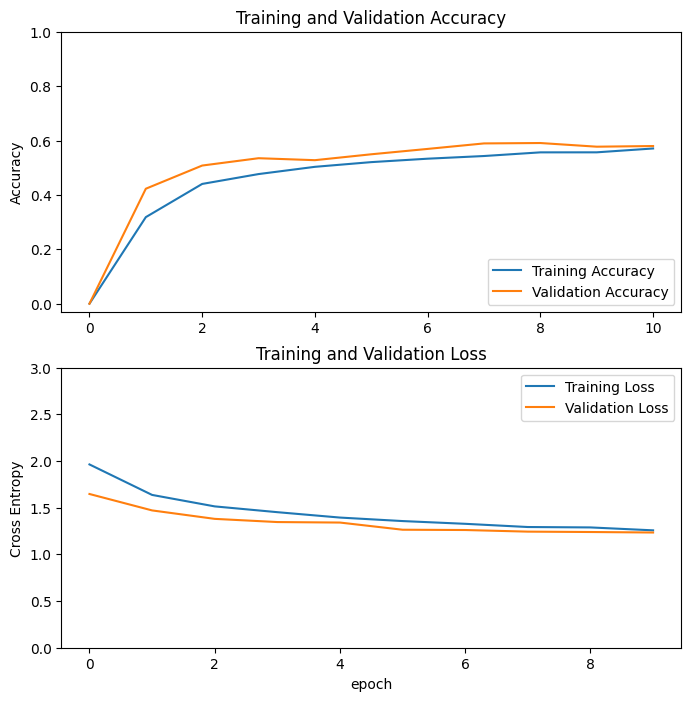

In [10]:
import matplotlib.pyplot as plt

acc = [0.] + model2_history.history['accuracy']
val_acc = [0.] + model2_history.history['val_accuracy']

loss = model2_history.history['loss']
val_loss = model2_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [11]:
base_model = model2.layers[1]
base_model.trainable = True

len(base_model.layers)

fine_tune_at = 115

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
model2_history2 = model2.fit(train_generator,
                             validation_data=validation_generator,
                             epochs=20,
                             verbose=1,
                             initial_epoch=model2_history.epoch[-1])

Epoch 10/20
131/131 [==============================] - 158s 1s/step - loss: 1.4695 - accuracy: 0.4982 - val_loss: 1.3389 - val_accuracy: 0.5465
Epoch 11/20
131/131 [==============================] - 147s 1s/step - loss: 1.1066 - accuracy: 0.6187 - val_loss: 0.9777 - val_accuracy: 0.6673
Epoch 12/20
131/131 [==============================] - 147s 1s/step - loss: 0.8946 - accuracy: 0.6911 - val_loss: 0.8973 - val_accuracy: 0.6957
Epoch 13/20
131/131 [==============================] - 158s 1s/step - loss: 0.7680 - accuracy: 0.7369 - val_loss: 0.7361 - val_accuracy: 0.7487
Epoch 14/20
131/131 [==============================] - 146s 1s/step - loss: 0.6925 - accuracy: 0.7693 - val_loss: 0.7034 - val_accuracy: 0.7761
Epoch 15/20
131/131 [==============================] - 149s 1s/step - loss: 0.5997 - accuracy: 0.7998 - val_loss: 0.6507 - val_accuracy: 0.7901
Epoch 16/20
131/131 [==============================] - 150s 1s/step - loss: 0.5481 - accuracy: 0.8188 - val_loss: 0.5497 - val_accuracy:

In [13]:
model2_history3 = model2.fit(train_generator,
                             validation_data=validation_generator,
                             epochs=30,
                             verbose=1,
                             initial_epoch=model2_history2.epoch[-1])

Epoch 20/30
131/131 [==============================] - 151s 1s/step - loss: 0.3521 - accuracy: 0.8790 - val_loss: 0.5095 - val_accuracy: 0.8368
Epoch 21/30
131/131 [==============================] - 151s 1s/step - loss: 0.3217 - accuracy: 0.8952 - val_loss: 0.3990 - val_accuracy: 0.8743
Epoch 22/30
131/131 [==============================] - 157s 1s/step - loss: 0.2946 - accuracy: 0.9002 - val_loss: 0.3796 - val_accuracy: 0.8849
Epoch 23/30
131/131 [==============================] - 149s 1s/step - loss: 0.2763 - accuracy: 0.9062 - val_loss: 0.4149 - val_accuracy: 0.8681
Epoch 24/30
131/131 [==============================] - 157s 1s/step - loss: 0.2557 - accuracy: 0.9133 - val_loss: 0.3805 - val_accuracy: 0.8767
Epoch 25/30
131/131 [==============================] - 157s 1s/step - loss: 0.2288 - accuracy: 0.9246 - val_loss: 0.3635 - val_accuracy: 0.8917
Epoch 26/30
131/131 [==============================] - 151s 1s/step - loss: 0.2066 - accuracy: 0.9311 - val_loss: 0.3159 - val_accuracy:

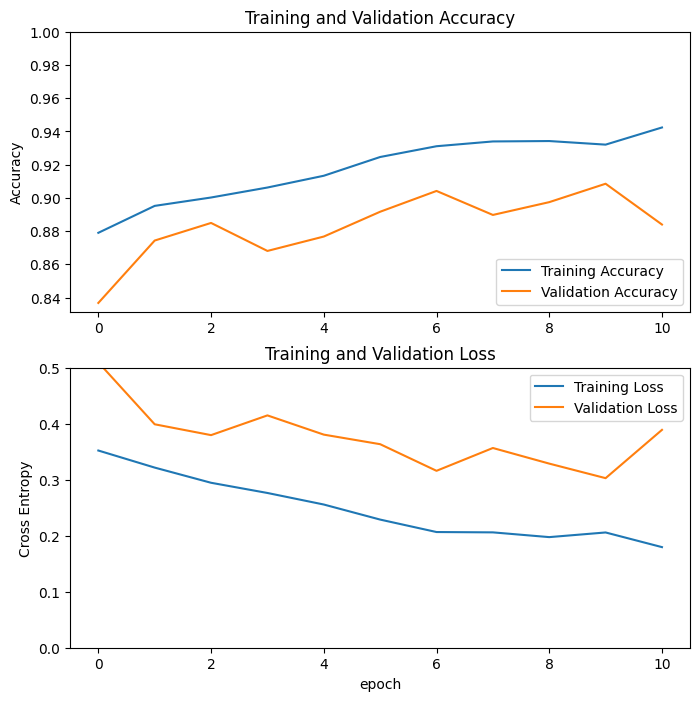

In [14]:
import matplotlib.pyplot as plt

acc = model2_history3.history['accuracy']
val_acc = model2_history3.history['val_accuracy']

loss = model2_history3.history['loss']
val_loss = model2_history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

callback = [early_stopping, reduce_lr]

In [16]:
model2_history4 = model2.fit(train_generator,
                             epochs=50,
                             validation_data=validation_generator, 
                             verbose=1,
                             initial_epoch=model2_history3.epoch[-1],
                             callbacks=[callback])

Epoch 30/50
131/131 [==============================] - 157s 1s/step - loss: 0.1899 - accuracy: 0.9353 - val_loss: 0.2963 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 31/50
131/131 [==============================] - 151s 1s/step - loss: 0.1717 - accuracy: 0.9403 - val_loss: 0.2649 - val_accuracy: 0.9172 - lr: 1.0000e-04
Epoch 32/50
131/131 [==============================] - 147s 1s/step - loss: 0.1590 - accuracy: 0.9469 - val_loss: 0.3463 - val_accuracy: 0.8922 - lr: 1.0000e-04
Epoch 33/50
131/131 [==============================] - 146s 1s/step - loss: 0.1617 - accuracy: 0.9466 - val_loss: 0.3014 - val_accuracy: 0.9085 - lr: 1.0000e-04
Epoch 34/50
131/131 [==============================] - 150s 1s/step - loss: 0.1475 - accuracy: 0.9496 - val_loss: 0.3219 - val_accuracy: 0.9013 - lr: 1.0000e-04
Epoch 35/50
131/131 [==============================] - 147s 1s/step - loss: 0.0966 - accuracy: 0.9672 - val_loss: 0.2296 - val_accuracy: 0.9326 - lr: 1.0000e-05
Epoch 36/50
131/131 [=============

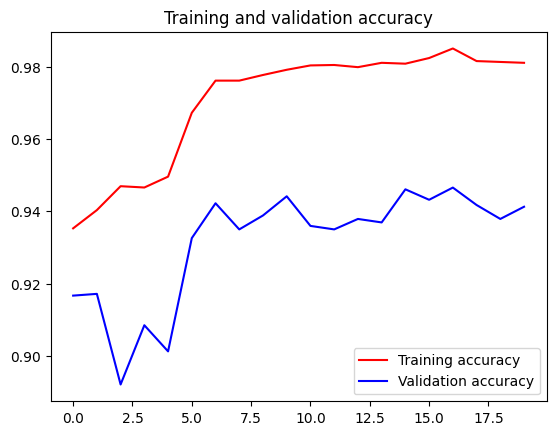

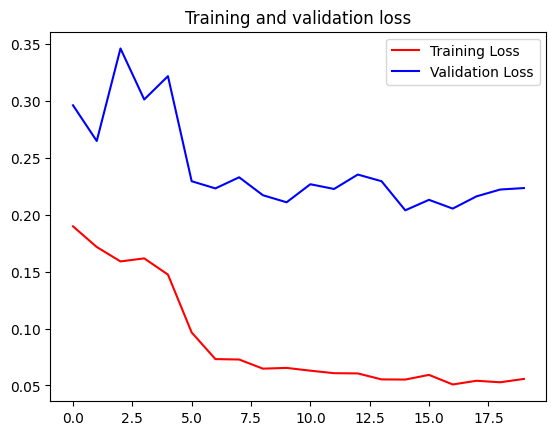

In [17]:
import matplotlib.pyplot as plt

acc = model2_history4.history['accuracy']
val_acc = model2_history4.history['val_accuracy']
loss = model2_history4.history['loss']
val_loss = model2_history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
sample_df=pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
labels_df=pd.read_csv('../input/paddy-disease-classification/train.csv')

In [19]:
testdir = '../input/paddy-disease-classification/test_images/'

testing = ImageDataGenerator(rescale=1.0/255).flow_from_directory(    
    directory=testdir,
    target_size=(224, 224),
    batch_size=64,
    classes=['.'],
    shuffle=False,
)

Found 3469 images belonging to 1 classes.


In [20]:
predict = tf.argmax(model2.predict(testing),axis=-1)
predict

55/55 [==============================] - 37s 660ms/step


<tf.Tensor: shape=(3469,), dtype=int64, numpy=array([7, 8, 4, ..., 8, 1, 5])>

In [21]:
diseases_types=sorted(list(set(labels_df['label'])))
n_classes=len(diseases_types)
predictions=[]
for i in predict:
    predictions.append(diseases_types[i])

In [22]:
predictions[:10]

['hispa',
 'normal',
 'brown_spot',
 'blast',
 'blast',
 'brown_spot',
 'dead_heart',
 'brown_spot',
 'hispa',
 'normal']

In [23]:
sample_submission=pd.read_csv("/kaggle/input/paddy-disease-classification/sample_submission.csv").drop('label',axis=1)
final=pd.DataFrame({'image_id': sample_submission.image_id, 'label': predictions})
final.to_csv('submission.csv', index=None)

In [24]:
history = model2.save("padimobile.h5")

In [25]:
# model = tf.keras.models.Sequential([
    
#     tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(216, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# # Print the model summary
# model.summary()

In [26]:
# model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

# callback = [early_stopping, reduce_lr]

In [28]:
# history = model.fit(train_generator, epochs=50, validation_data = validation_generator, verbose = 1, callbacks = [callback])

In [29]:
# import matplotlib.pyplot as plt

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()
